In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/road-accident-united-kingdom-uk-dataset/UK_Accident.csv


In [2]:
import scipy.stats as stats
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [3]:
import warnings
warnings.simplefilter('ignore')
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
pd.set_option('display.float_format',lambda x: '%.2f' %x)
sns.set_style('whitegrid')
%matplotlib inline

In [4]:
df=pd.read_csv('/kaggle/input/road-accident-united-kingdom-uk-dataset/UK_Accident.csv',parse_dates=['Date','Time'])

**Data preprocessing**

In [5]:
df.columns

Index(['Unnamed: 0', 'Accident_Index', 'Location_Easting_OSGR',
       'Location_Northing_OSGR', 'Longitude', 'Latitude', 'Police_Force',
       'Accident_Severity', 'Number_of_Vehicles', 'Number_of_Casualties',
       'Date', 'Day_of_Week', 'Time', 'Local_Authority_(District)',
       'Local_Authority_(Highway)', '1st_Road_Class', '1st_Road_Number',
       'Road_Type', 'Speed_limit', 'Junction_Control', '2nd_Road_Class',
       '2nd_Road_Number', 'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'LSOA_of_Accident_Location', 'Year'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1504150 entries, 0 to 1504149
Data columns (total 33 columns):
 #   Column                                       Non-Null Count    Dtype         
---  ------                                       --------------    -----         
 0   Unnamed: 0                                   1504150 non-null  int64         
 1   Accident_Index                               1504150 non-null  object        
 2   Location_Easting_OSGR                        1504049 non-null  float64       
 3   Location_Northing_OSGR                       1504150 non-null  float64       
 4   Longitude                                    1504049 non-null  float64       
 5   Latitude                                     1504150 non-null  float64       
 6   Police_Force                                 1504150 non-null  int64         
 7   Accident_Severity                            1504150 non-null  int64         
 8   Number_of_Vehicles                           1504150

In [7]:
#df.drop(columns=['Unnamed: 0', 'Location_Easting_OSGR','Location_Northing_OSGR','LSOA_of_Accident_Location','Local_Authority_(Highway)'],inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1504150 entries, 0 to 1504149
Data columns (total 33 columns):
 #   Column                                       Non-Null Count    Dtype         
---  ------                                       --------------    -----         
 0   Unnamed: 0                                   1504150 non-null  int64         
 1   Accident_Index                               1504150 non-null  object        
 2   Location_Easting_OSGR                        1504049 non-null  float64       
 3   Location_Northing_OSGR                       1504150 non-null  float64       
 4   Longitude                                    1504049 non-null  float64       
 5   Latitude                                     1504150 non-null  float64       
 6   Police_Force                                 1504150 non-null  int64         
 7   Accident_Severity                            1504150 non-null  int64         
 8   Number_of_Vehicles                           1504150

In [9]:
df.head(5)

,Unnamed: 0,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),Local_Authority_(Highway),1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,Junction_Control,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
0,0,200501BS00001,525680.00,178240.00,-0.19,51.49,1,2,1,1,2005-04-01,3,2023-04-04 17:42:00,12,E09000020,3,3218,Single carriageway,30,None,-1,0,None within 50 metres,Zebra crossing,Daylight: Street light present,Raining without high winds,Wet/Damp,None,None,1,Yes,E01002849,2005
1,1,200501BS00002,524170.00,181650.00,-0.21,51.52,1,3,1,1,2005-05-01,4,2023-04-04 17:36:00,12,E09000020,4,450,Dual carriageway,30,Automatic traffic signal,5,0,None within 50 metres,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002909,2005
2,2,200501BS00003,524520.00,182240.00,-0.21,51.53,1,3,2,1,2005-06-01,5,2023-04-04 00:15:00,12,E09000020,5,0,Single carriageway,30,None,-1,0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002857,2005
3,3,200501BS00004,526900.00,177530.00,-0.17,51.48,1,3,1,1,2005-07-01,6,2023-04-04 10:35:00,12,E09000020,3,3220,Single carriageway,30,None,-1,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01002840,2005
4,4,200501BS00005,528060.00,179040.00,-0.16,51.50,1,3,1,1,2005-10-01,2,2023-04-04 21:13:00,12,E09000020,6,0,Single carriageway,30,None,-1,0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lighting unknown,Fine without high winds,Wet/Damp,None,None,1,Yes,E01002863,2005


In [10]:
df.isnull().sum() / len(df) * 100

Unnamed: 0                                    0.00
Accident_Index                                0.00
Location_Easting_OSGR                         0.01
Location_Northing_OSGR                        0.00
Longitude                                     0.01
Latitude                                      0.00
Police_Force                                  0.00
Accident_Severity                             0.00
Number_of_Vehicles                            0.00
Number_of_Casualties                          0.00
Date                                          0.00
Day_of_Week                                   0.00
Time                                          0.01
Local_Authority_(District)                    0.00
Local_Authority_(Highway)                     0.00
1st_Road_Class                                0.00
1st_Road_Number                               0.00
Road_Type                                     0.00
Speed_limit                                   0.00
Junction_Control               

In [11]:
df.dropna(subset=['Longitude','Time','Pedestrian_Crossing-Human_Control','Pedestrian_Crossing-Physical_Facilities'],inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1503890 entries, 0 to 1504149
Data columns (total 33 columns):
 #   Column                                       Non-Null Count    Dtype         
---  ------                                       --------------    -----         
 0   Unnamed: 0                                   1503890 non-null  int64         
 1   Accident_Index                               1503890 non-null  object        
 2   Location_Easting_OSGR                        1503890 non-null  float64       
 3   Location_Northing_OSGR                       1503890 non-null  float64       
 4   Longitude                                    1503890 non-null  float64       
 5   Latitude                                     1503890 non-null  float64       
 6   Police_Force                                 1503890 non-null  int64         
 7   Accident_Severity                            1503890 non-null  int64         
 8   Number_of_Vehicles                           1503890

In [13]:
df.isnull().sum() / len(df) * 100

Unnamed: 0                                    0.00
Accident_Index                                0.00
Location_Easting_OSGR                         0.00
Location_Northing_OSGR                        0.00
Longitude                                     0.00
Latitude                                      0.00
Police_Force                                  0.00
Accident_Severity                             0.00
Number_of_Vehicles                            0.00
Number_of_Casualties                          0.00
Date                                          0.00
Day_of_Week                                   0.00
Time                                          0.00
Local_Authority_(District)                    0.00
Local_Authority_(Highway)                     0.00
1st_Road_Class                                0.00
1st_Road_Number                               0.00
Road_Type                                     0.00
Speed_limit                                   0.00
Junction_Control               

In [14]:
duplicate_rows=df[df.duplicated()]
print("Number of duplicate rows: ",duplicate_rows.shape[0])

Number of duplicate rows:  0


In [15]:
df.drop_duplicates(inplace=True)
print("Updated number of rows:",df.shape[0])

Updated number of rows: 1503890


In [16]:
df.describe(include=np.number)

,Unnamed: 0,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),1st_Road_Class,1st_Road_Number,Speed_limit,2nd_Road_Class,2nd_Road_Number,Urban_or_Rural_Area,Year
count,1503890.00,1503890.00,1503890.00,1503890.00,1503890.00,1503890.00,1503890.00,1503890.00,1503890.00,1503890.00,1503890.00,1503890.00,1503890.00,1503890.00,1503890.00,1503890.00,1503890.00,1503890.00
mean,253044.59,439628.26,300126.23,-1.44,52.59,30.20,2.84,1.83,1.35,4.12,347.57,4.09,1009.91,39.00,2.68,381.60,1.35,2009.37
std,148912.46,95115.55,160971.38,1.40,1.45,25.51,0.40,0.71,0.83,1.92,259.39,1.43,1823.44,14.14,3.21,1302.59,0.48,3.01
min,0.00,64950.00,10290.00,-7.52,49.91,1.00,1.00,1.00,1.00,1.00,1.00,1.00,-1.00,10.00,-1.00,-1.00,1.00,2005.00
25%,125348.00,375070.00,178260.00,-2.37,51.49,6.00,3.00,1.00,1.00,2.00,110.00,3.00,0.00,30.00,-1.00,0.00,1.00,2006.00
50%,250702.00,439970.00,268780.00,-1.40,52.31,30.00,3.00,2.00,1.00,4.00,322.00,4.00,129.00,30.00,3.00,0.00,1.00,2010.00
75%,376035.00,523060.00,398140.00,-0.22,53.48,45.00,3.00,2.00,1.00,6.00,518.00,6.00,725.00,50.00,6.00,0.00,2.00,2012.00
max,570010.00,655370.00,1208800.00,1.76,60.76,98.00,3.00,67.00,93.00,7.00,941.00,6.00,9999.00,70.00,6.00,9999.00,3.00,2014.00


In [17]:
df.describe(include=np.object)

,Accident_Index,Local_Authority_(Highway),Road_Type,Junction_Control,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
count,1503890,1503890,1503890,1503890,1503890,1503890,1503890,1503890,1503890,1503890,1503890,1503890,1395848
unique,927301,207,6,5,3,6,5,9,6,8,6,2,35452
top,2.01E+12,E10000016,Single carriageway,Giveway or uncontrolled,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,Yes,E01000004
freq,381273,40391,1126753,733853,1495029,1252381,1102046,1203751,1034504,1467316,1476648,1218681,2074


In [18]:
numerical_data=df.select_dtypes(include='number')
num_cols=numerical_data.columns
len(num_cols)

18

In [19]:
categorical_data=df.select_dtypes(include='object')
cat_cols=categorical_data.columns
len(cat_cols)

13

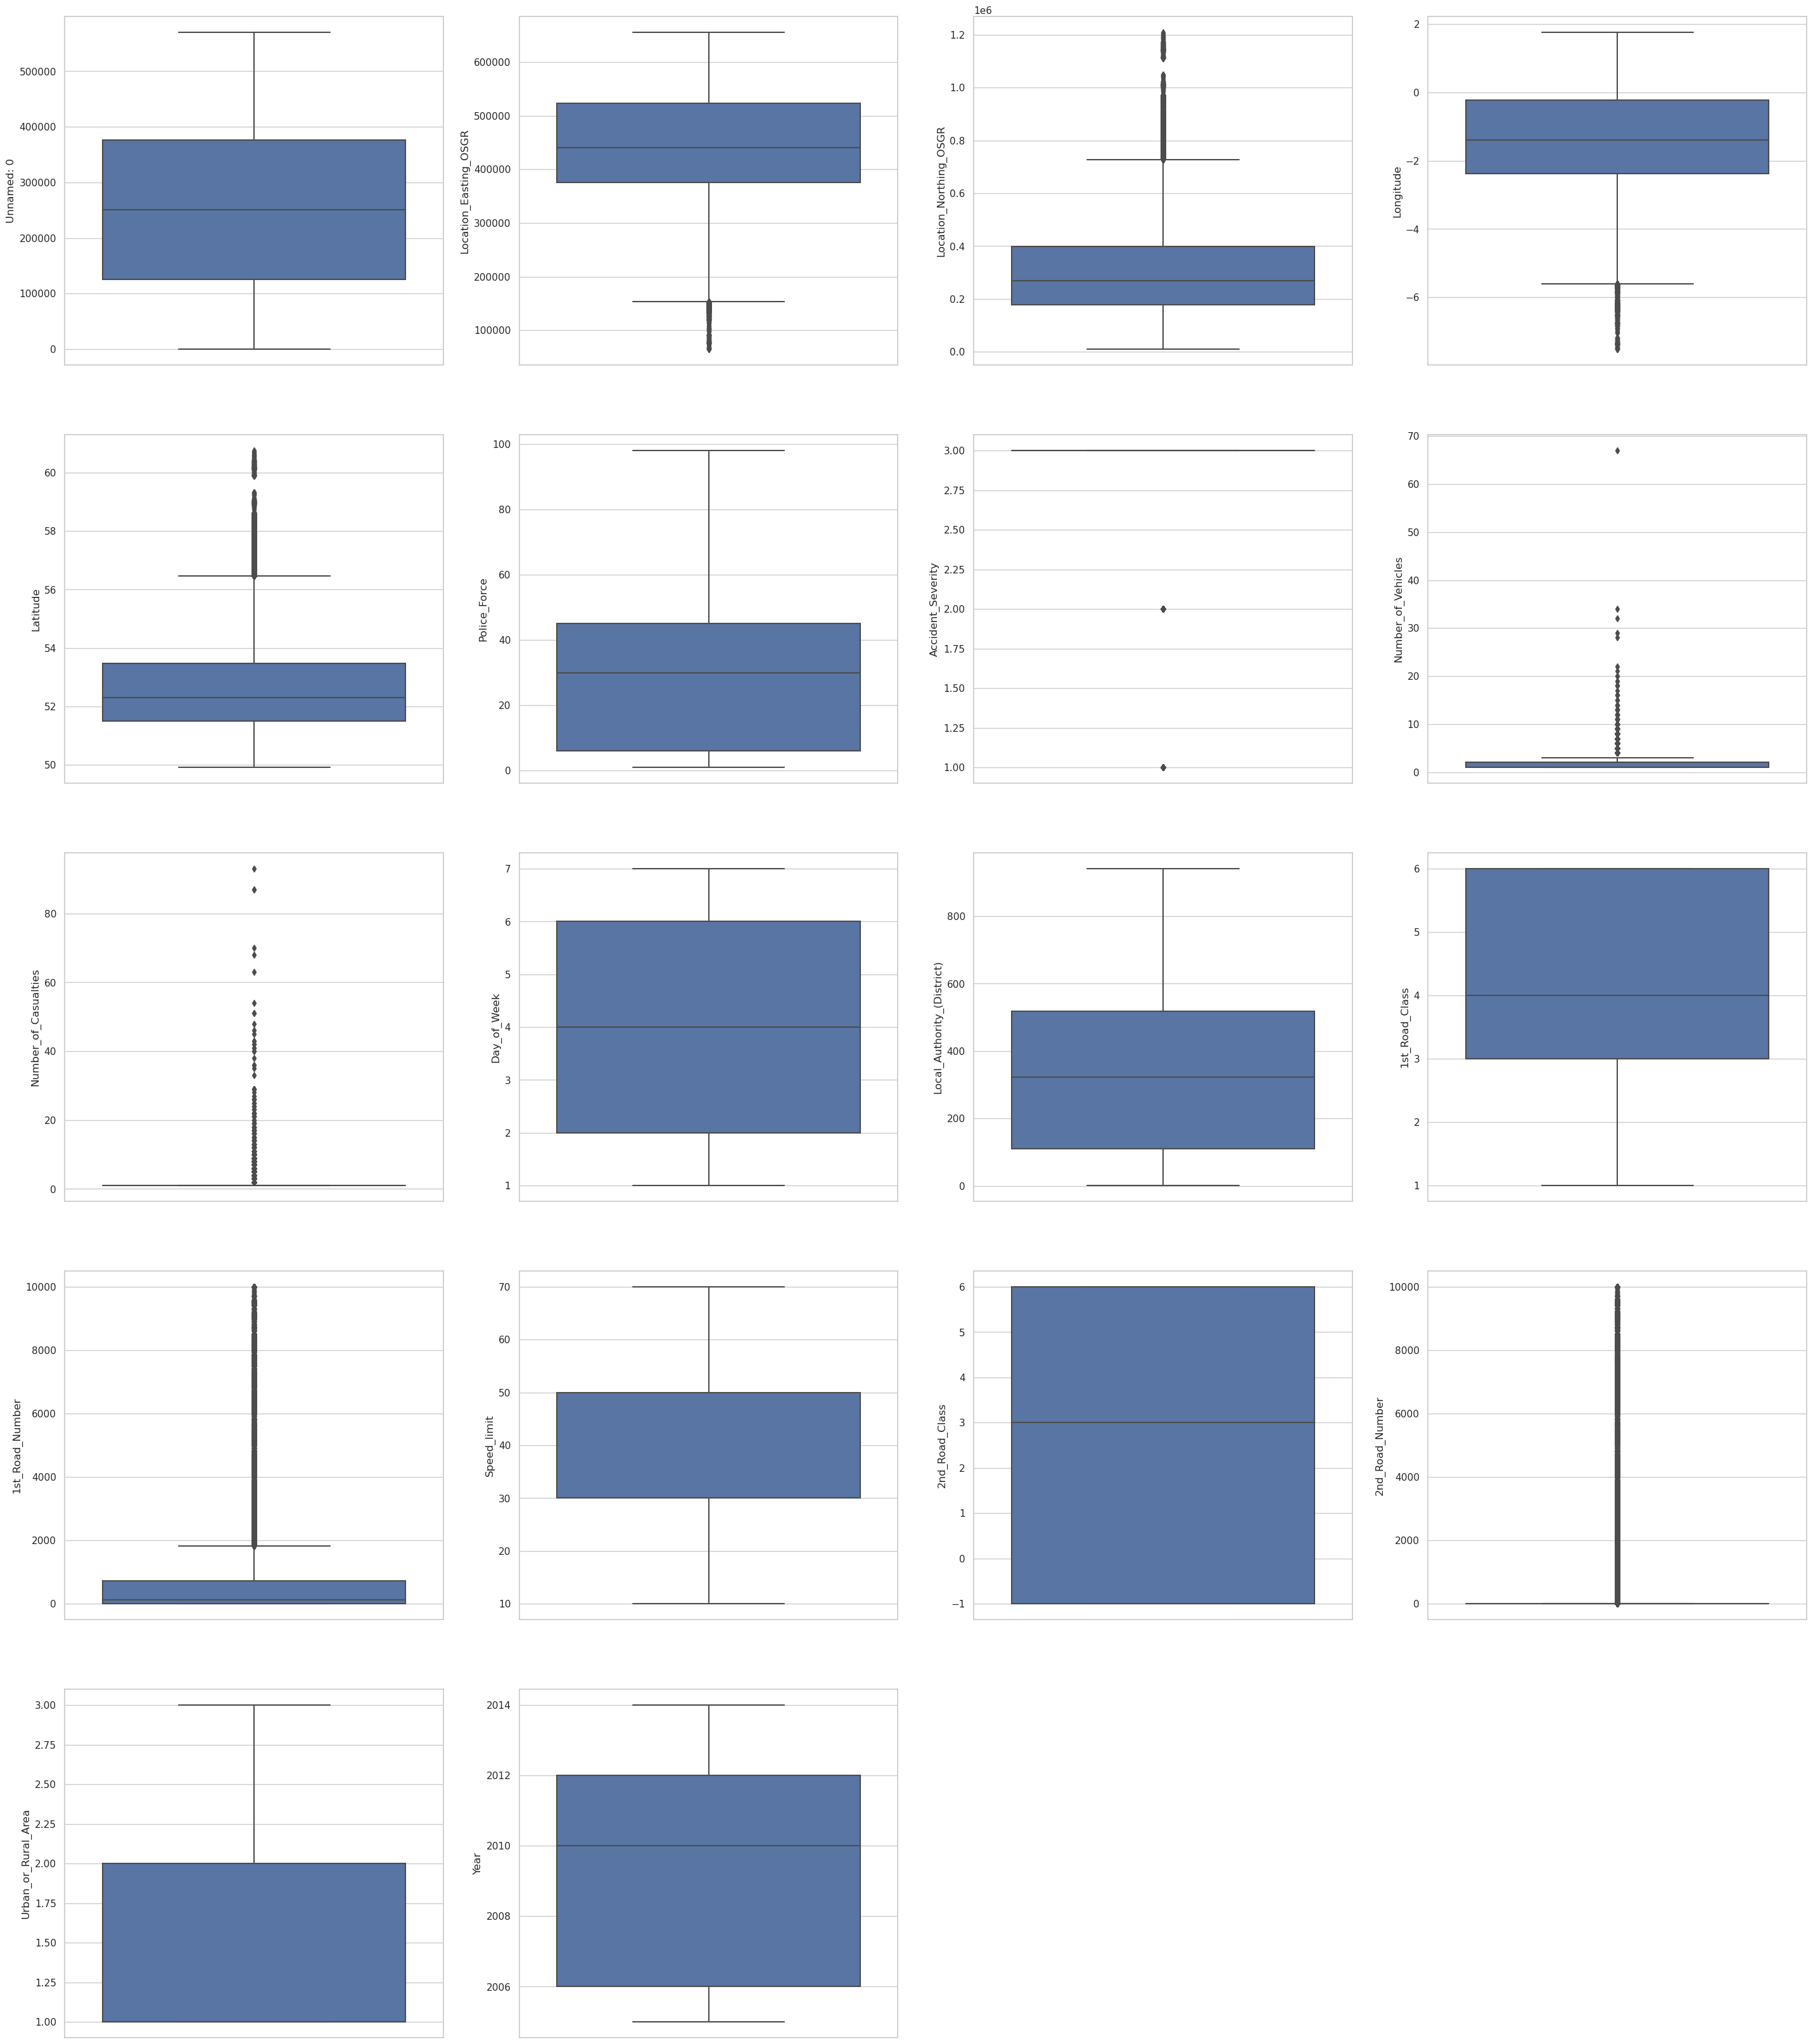

CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 8.34 µs


In [20]:
sns.set(style='whitegrid')
fig=plt.figure(figsize=(20,50))
fig.subplots_adjust(right=1.5)

for plot in range (1, len(num_cols)+1):
    plt.subplot(6,4,plot)
    sns.boxplot(y=df[num_cols[plot-1]])
    
plt.show()
%time

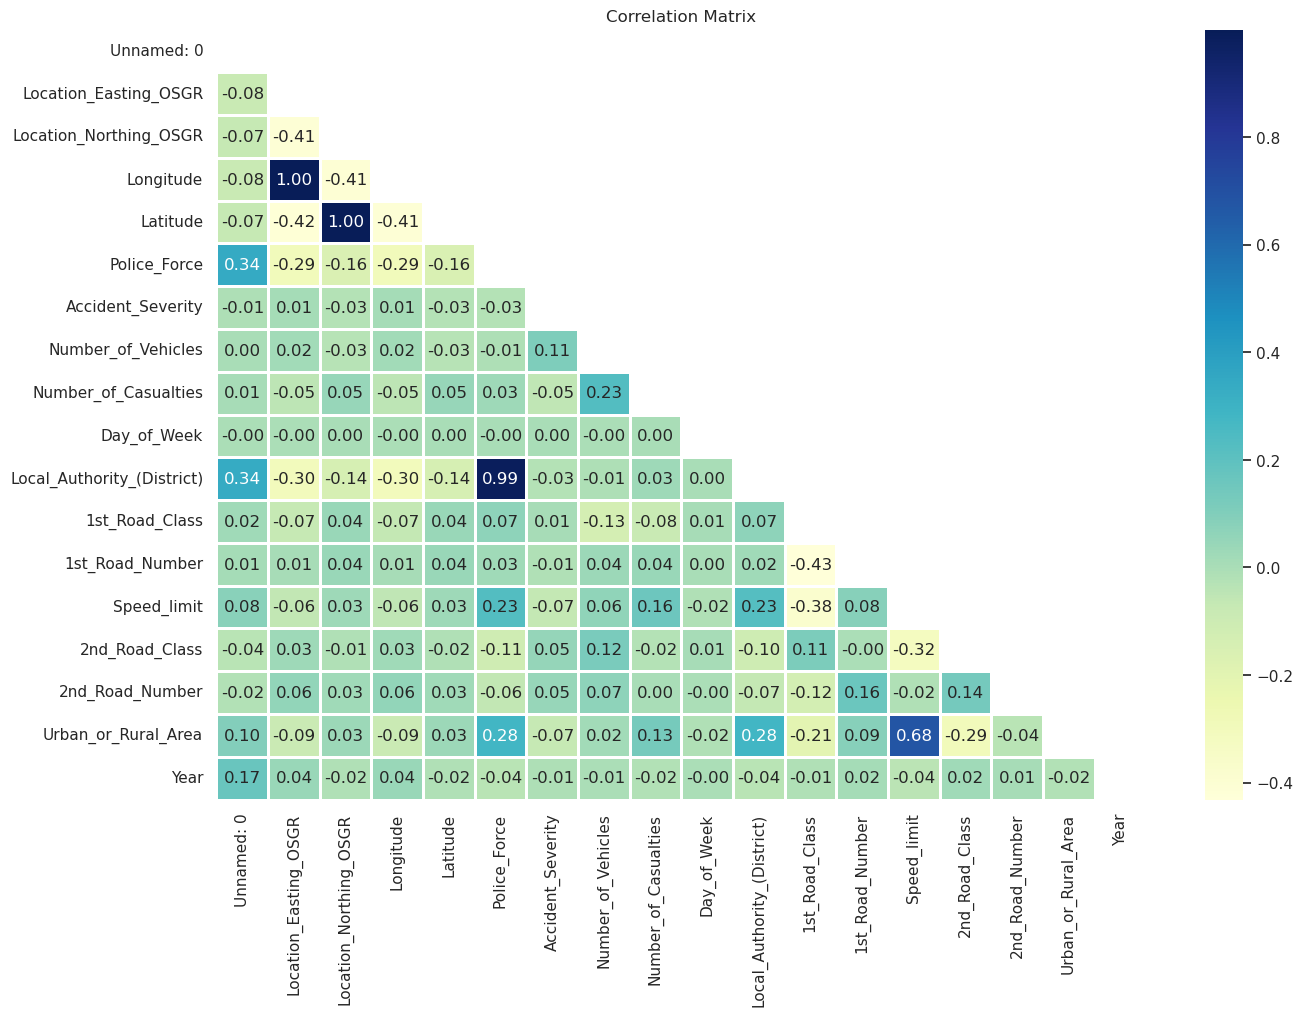

In [21]:
plt.figure(figsize=(15,10))
corr=df.corr(method='spearman')
mask=np.triu(np.ones_like(corr,dtype=bool))
cormat=sns.heatmap(corr,mask=mask,annot=True,cmap='YlGnBu',linewidths=1,fmt='.2f')
cormat.set_title('Correlation Matrix')
plt.show()

In [22]:
def get_corr(data,threshold):
    corr_col=set()
    cormat=data.corr()
    for i in range(len(cormat.columns)):
        for j in range(i):
            if abs(cormat.iloc[i,j])>threshold:
                col_name=cormat.columns[i]
                corr_col.add(col_name)
    return corr_col

corr_features=get_corr(df,0.80)
print(corr_features)

{'Longitude', 'Latitude', 'Local_Authority_(District)'}


In [23]:
df.drop(columns=['Local_Authority_(District)'],axis=1,inplace=True)

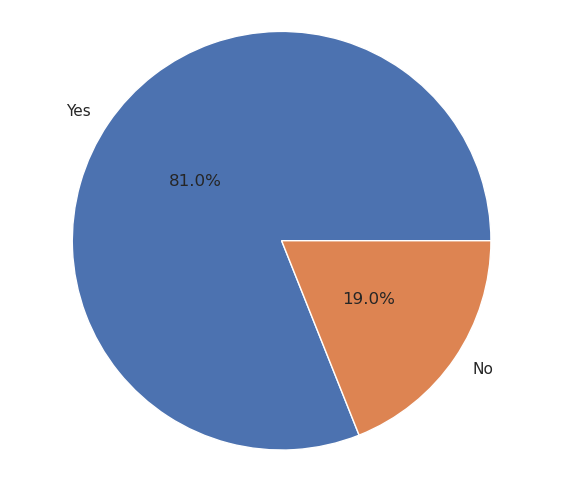

In [24]:
def pie_chart(data,col):
    x=data[col].value_counts().values
    plt.figure(figsize=(7,6))
    plt.pie(x,center=(0,0),radius=1.5,labels=data[col].unique(),autopct='%1.1f%%',pctdistance=0.5)
    plt.axis('equal')
    plt.show()
    
pie_lst=['Did_Police_Officer_Attend_Scene_of_Accident']
for col in pie_lst:
    pie_chart(df,col)

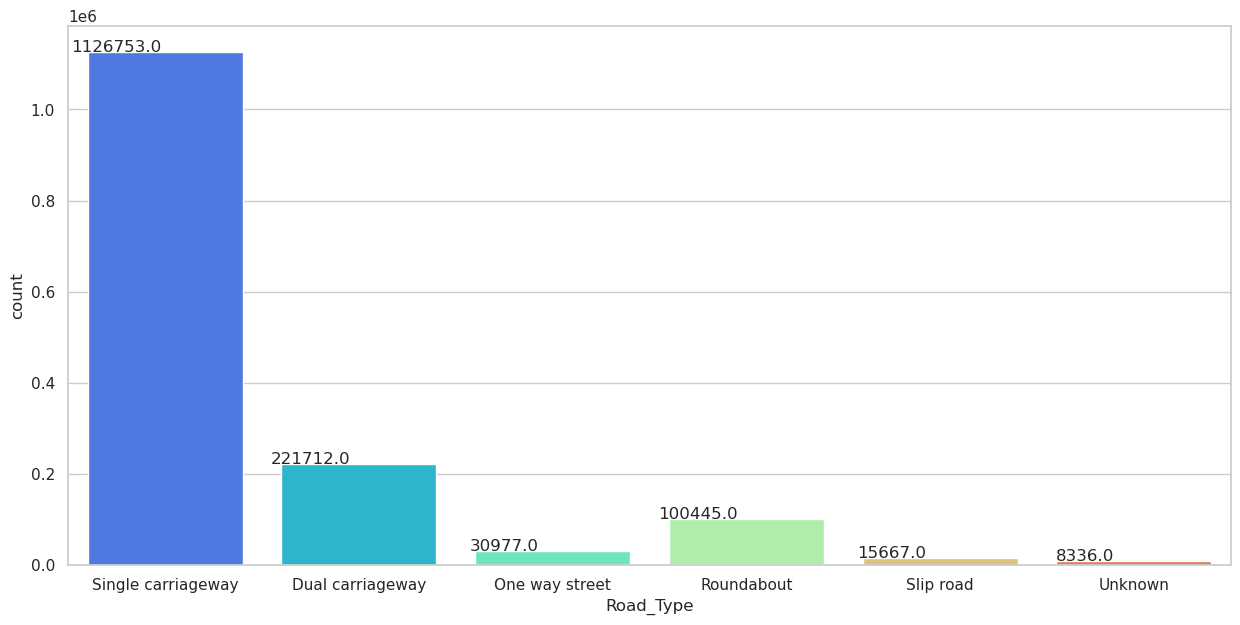

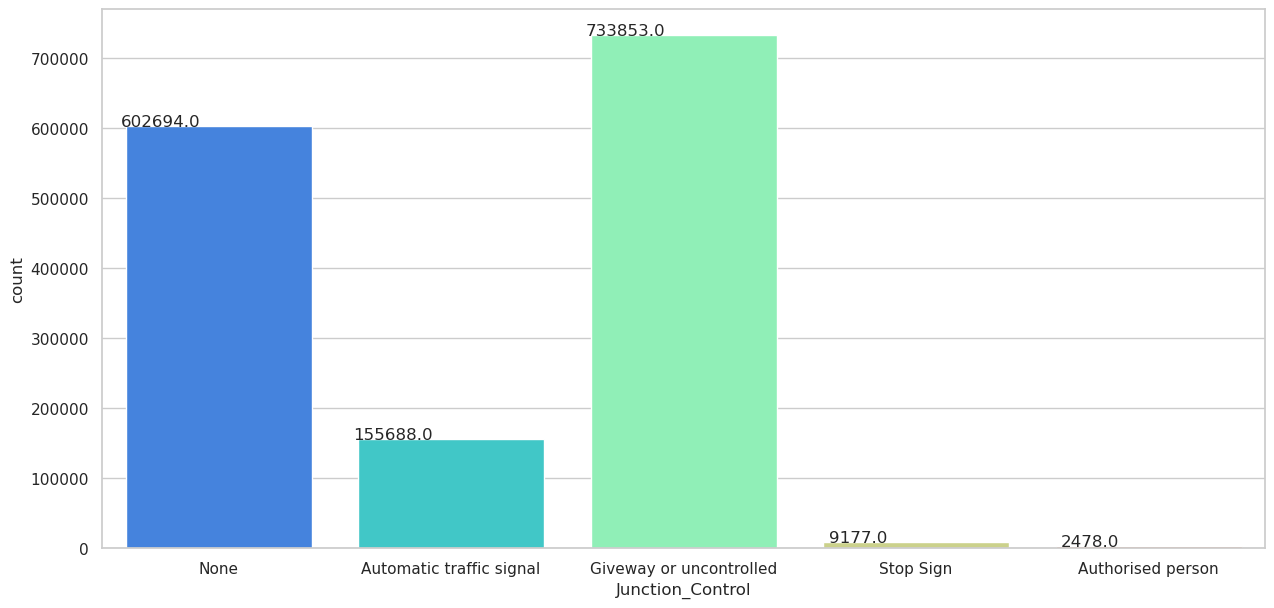

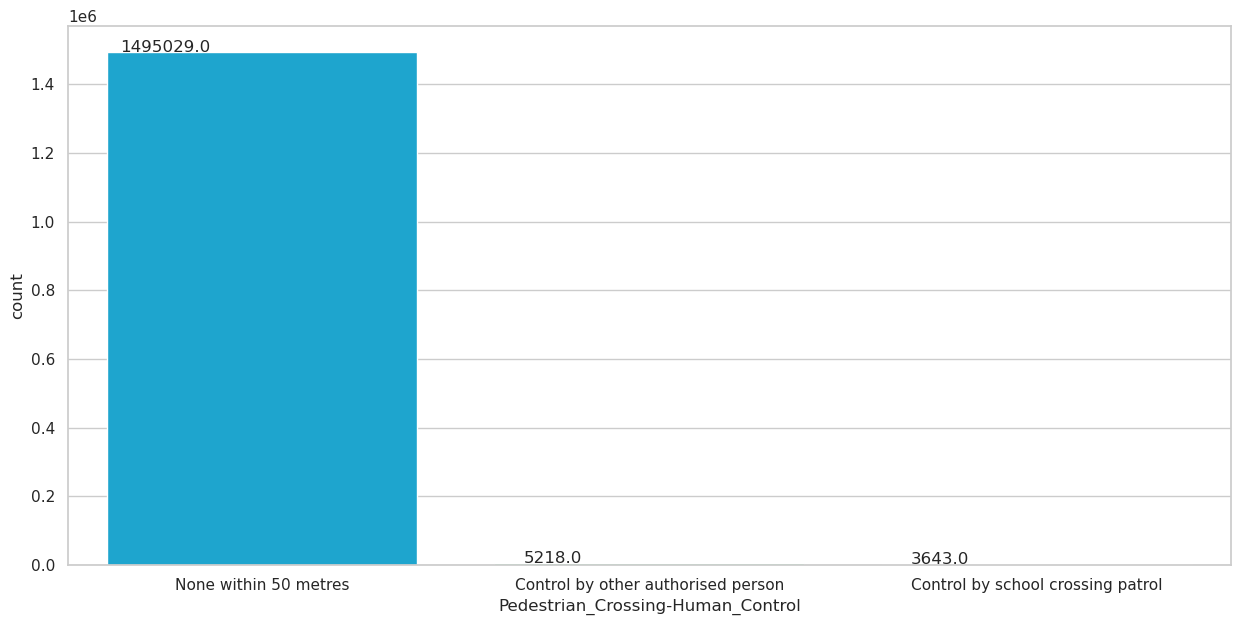

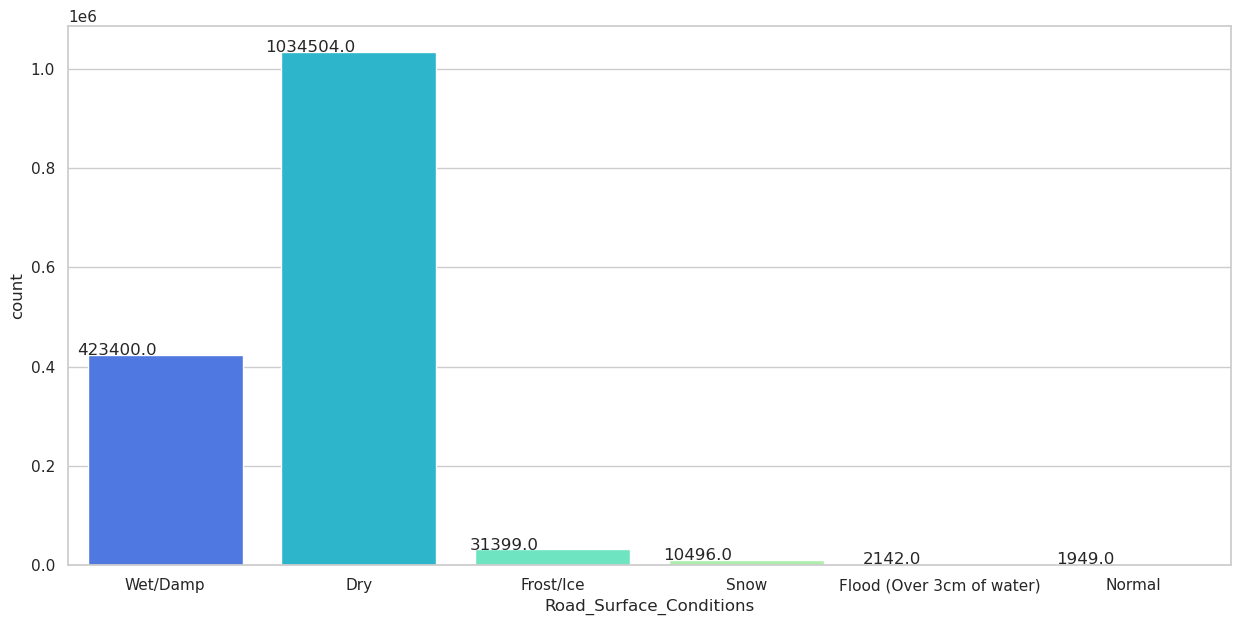

In [25]:
def cnt_plot(data,col):
    plt.figure(figsize=(15,7))
    ax1 = sns.countplot(x=col, data=data,palette='rainbow')

    for p in ax1.patches:
        ax1.annotate('{}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+1), ha='center')

    plt.show()

    print('\n')

cnt_lst1 = ['Road_Type', 'Junction_Control',
           'Pedestrian_Crossing-Human_Control',
           'Road_Surface_Conditions']

for col in cnt_lst1:
    cnt_plot(df, col)

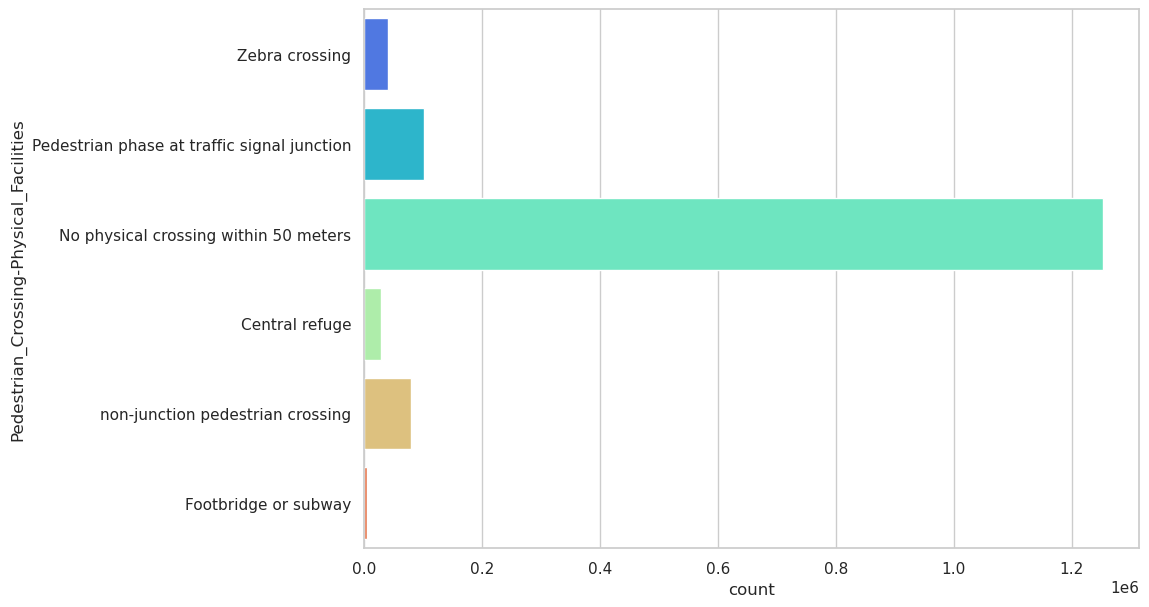

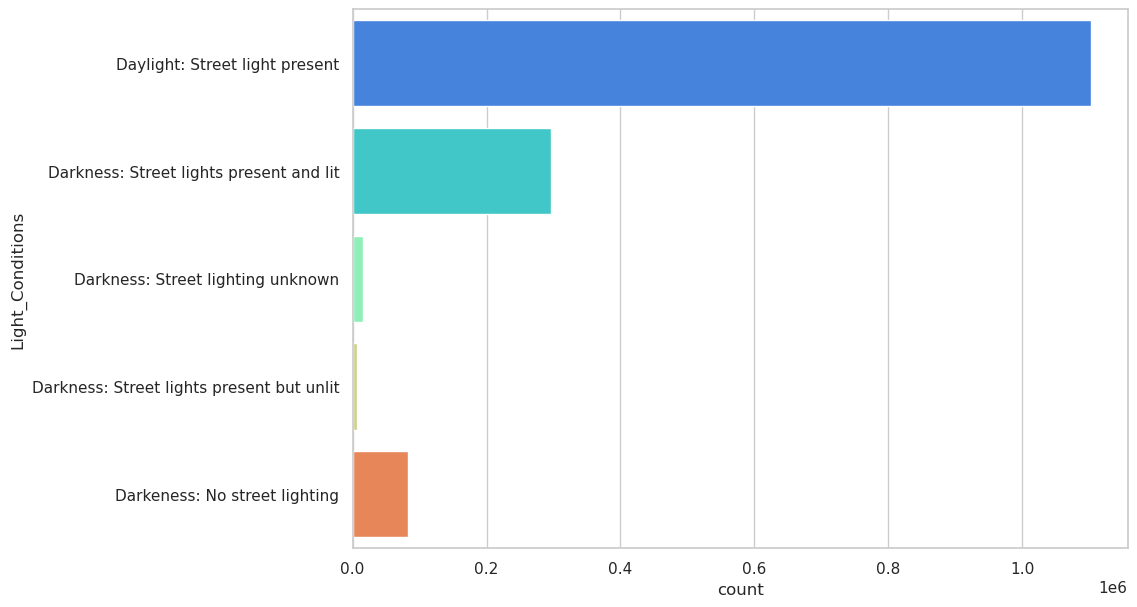

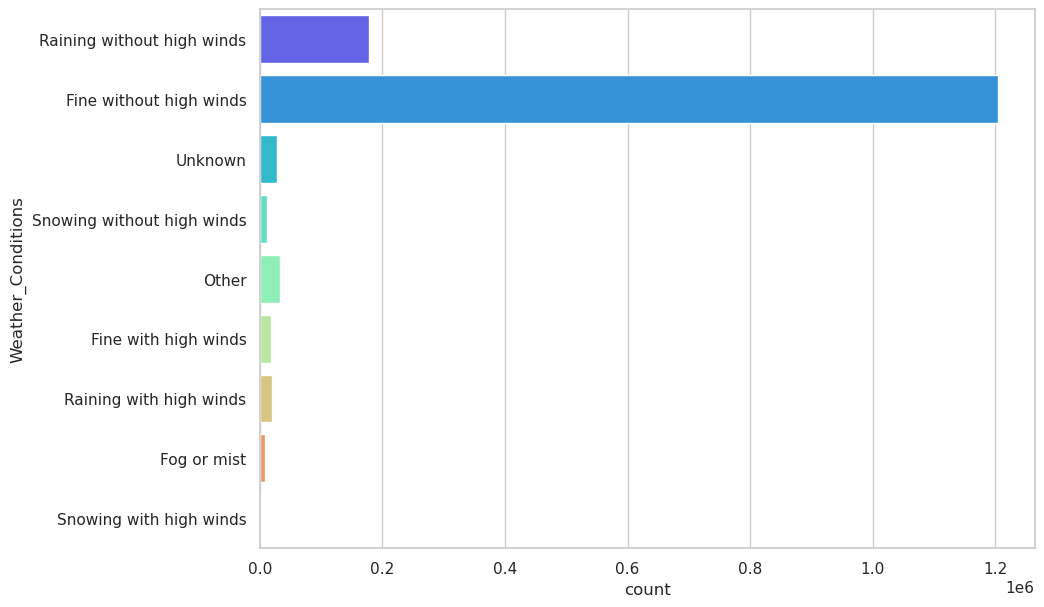

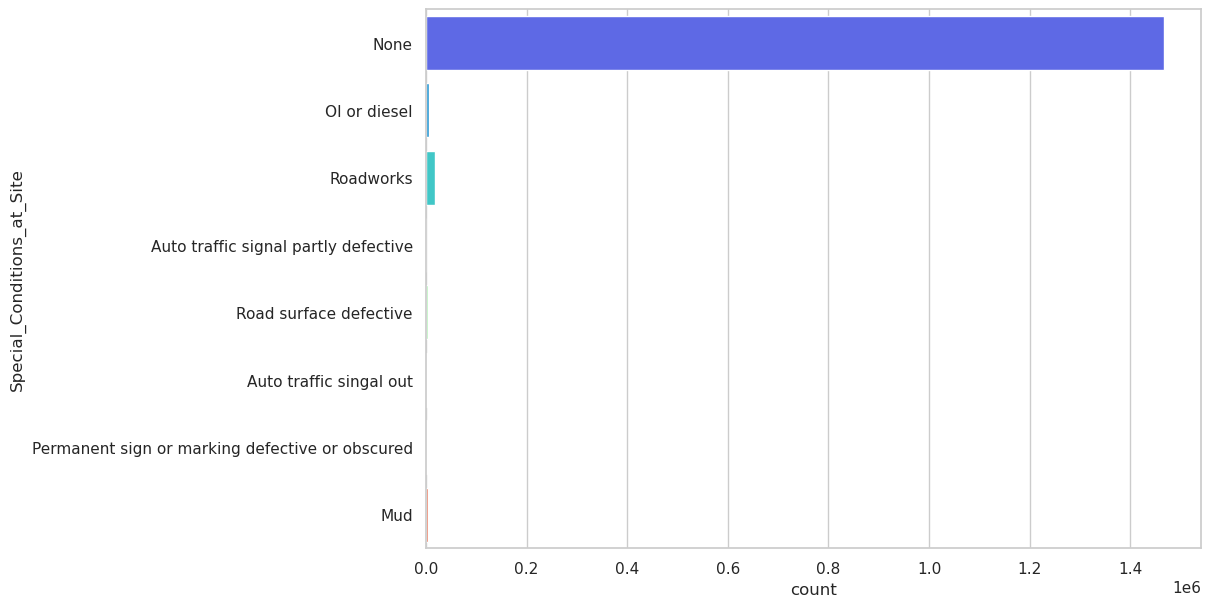

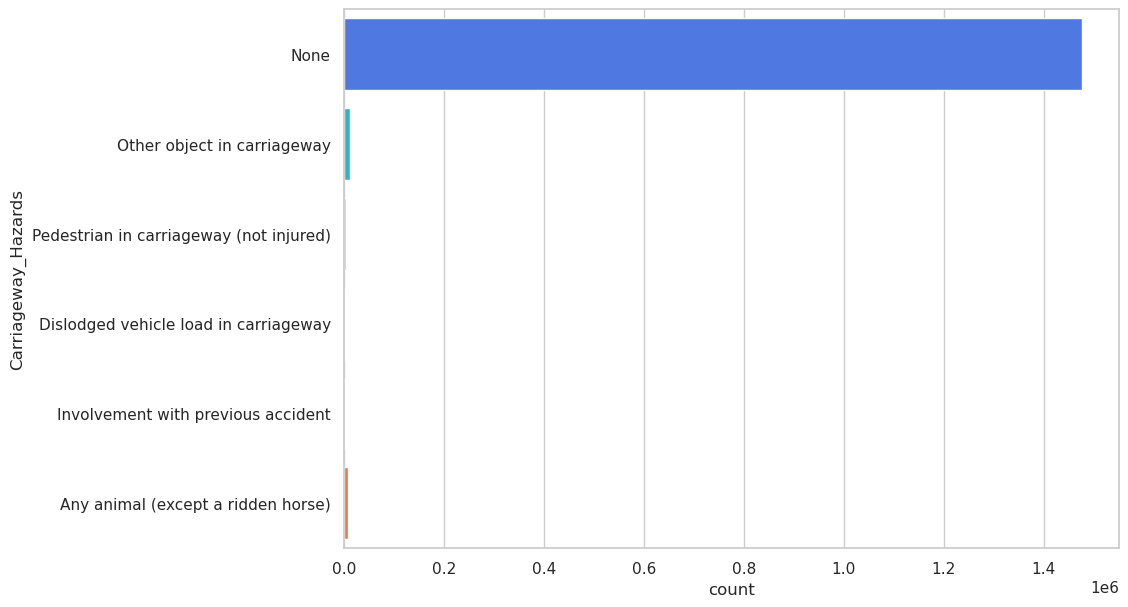

In [26]:
def cnt_plot(data, col):
  plt.figure(figsize=(10, 7))
  sns.countplot(y=col, data=data,palette='rainbow')
  plt.show()

  print('\n')
  
cnt_lst2 = ['Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
            'Weather_Conditions',
            'Special_Conditions_at_Site', 'Carriageway_Hazards']

for col in cnt_lst2:
  cnt_plot(df, col)